# Introduction to Matplotlib

In [1]:
%matplotlib inline 
# inline lets us print the plots inside our jupyter notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

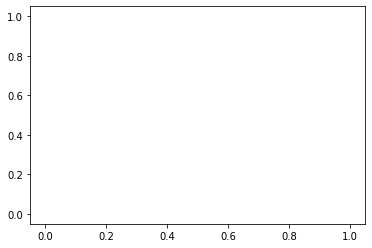

In [2]:
plt.plot()

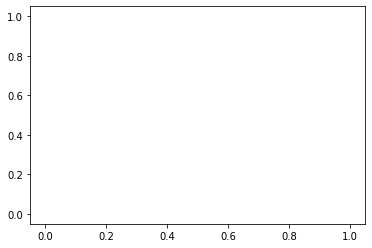

In [3]:
plt.plot(); #semi-colon gets rid of the brackets of above

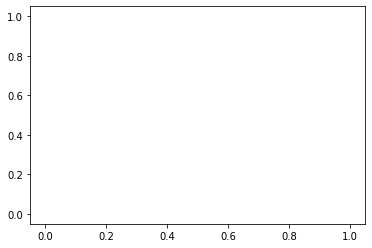

In [4]:
plt.plot()
plt.show()

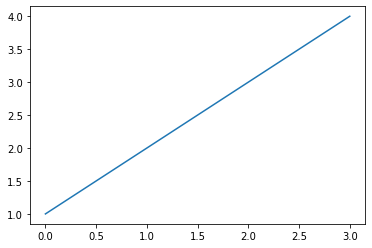

In [5]:
plt.plot([1, 2, 3, 4]);

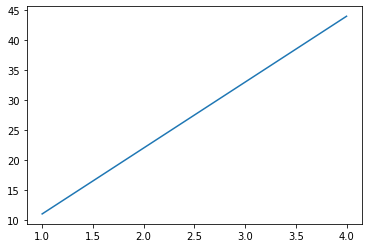

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

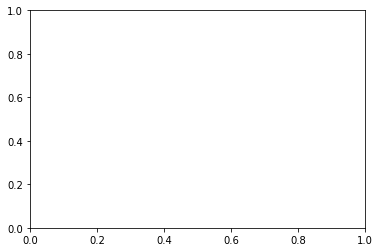

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

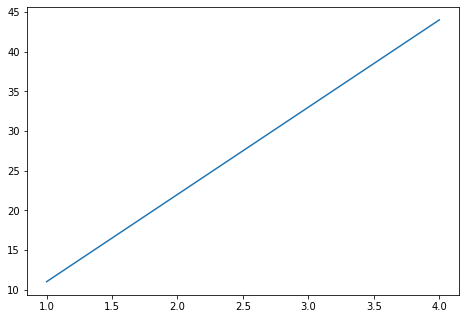

In [8]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

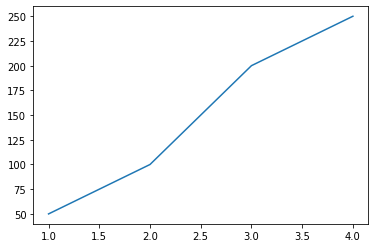

In [9]:
# 3rd method (recommended)
fig, ax = plt.subplots() # everytime you call fig its going to reset the data and create a new one
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

<img src="matplotlib-anatomy-of-a-plot.png"/>

## Matplotlib example workflow

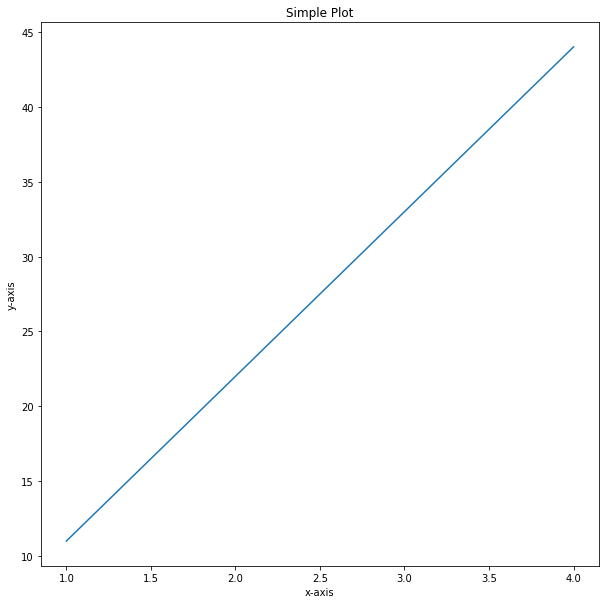

In [10]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # Width and Height
 
# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x-axis",
       ylabel="y-axis")

# 5. Save & show( you save the whole figure) You could also right click the plot and save image as...
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [11]:
import numpy as np

In [12]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

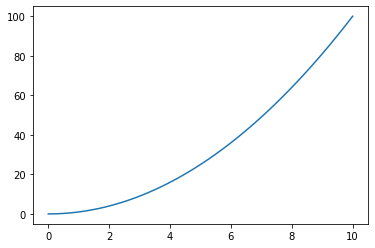

In [13]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

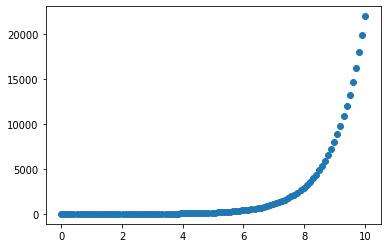

In [14]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

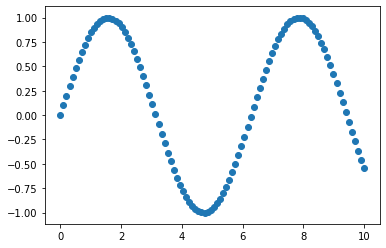

In [15]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

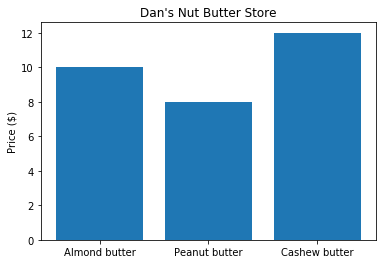

In [16]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) # (x, y)
ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)");

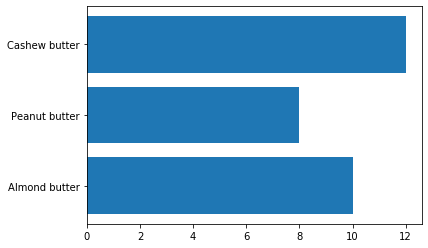

In [17]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

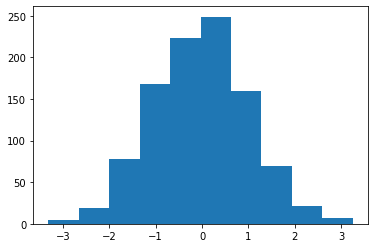

In [18]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

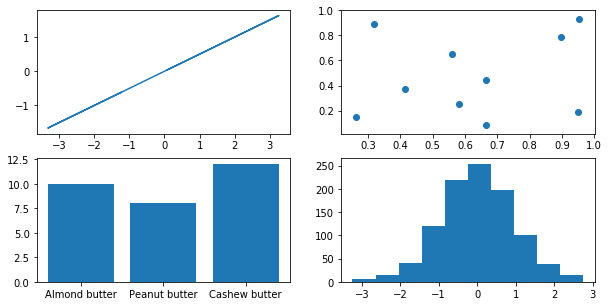

In [19]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

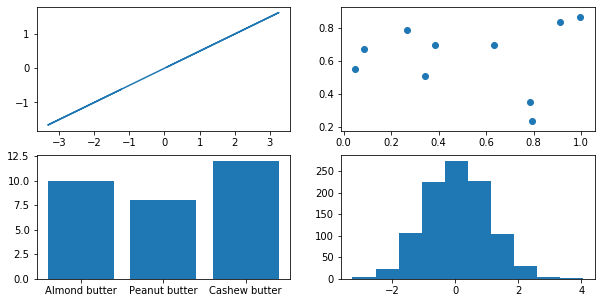

In [20]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))
# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [21]:
import pandas as pd

In [22]:
# Make a DataFrame
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


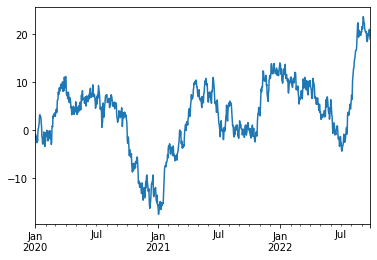

In [23]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()

ts.plot()

In [24]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [25]:
type(car_sales["Price"][0])

str

In [26]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [28]:
type(car_sales["Price"][0])

str

In [30]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


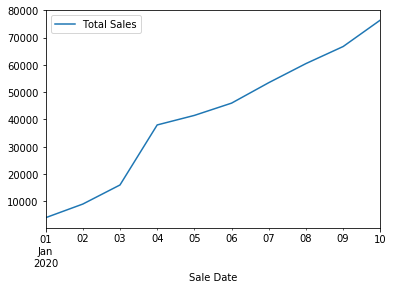

In [31]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

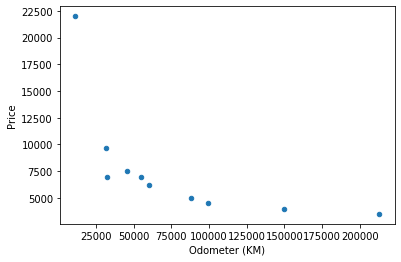

In [32]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [33]:
# How about a bar graph?
x = np.random.rand(10, 4)
x

# Turn it into a DataFrame
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.276236,0.241619,0.038686,0.385468
1,0.833683,0.464380,0.865125,0.625186
2,0.338024,0.129354,0.668848,0.589061
3,0.557870,0.622626,0.728251,0.077368
4,0.203515,0.091955,0.221450,0.665081
5,0.471066,0.204783,0.761218,0.073082
6,0.439932,0.669180,0.593390,0.162216
7,0.451416,0.060357,0.748108,0.237002
8,0.408800,0.520983,0.435971,0.257661
9,0.327168,0.769135,0.057481,0.743654


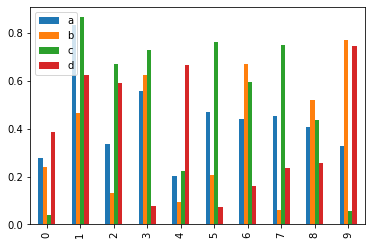

In [34]:
df.plot.bar();

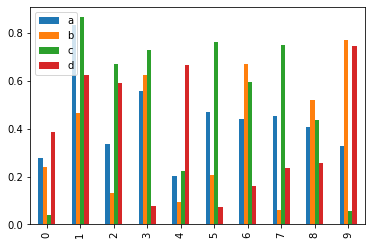

In [35]:
df.plot(kind="bar");

In [36]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


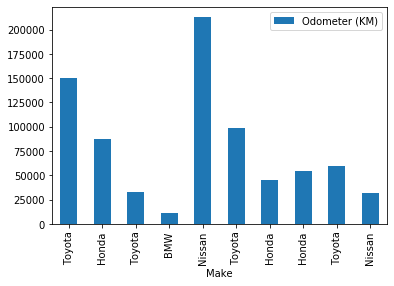

In [37]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

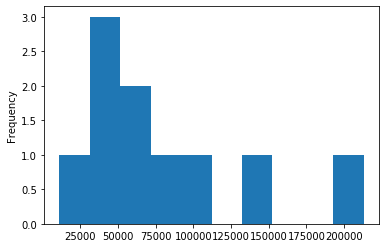

In [38]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist();

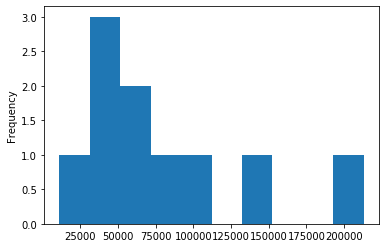

In [39]:
car_sales["Odometer (KM)"].plot(kind="hist");

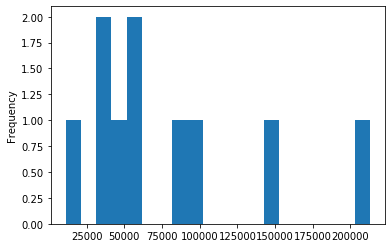

In [42]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [44]:
# Let's try on another data set
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


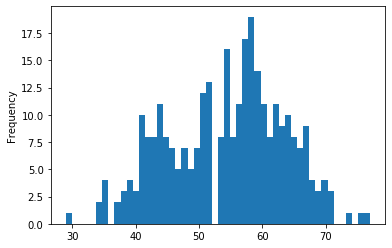

In [48]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=50);

In [49]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


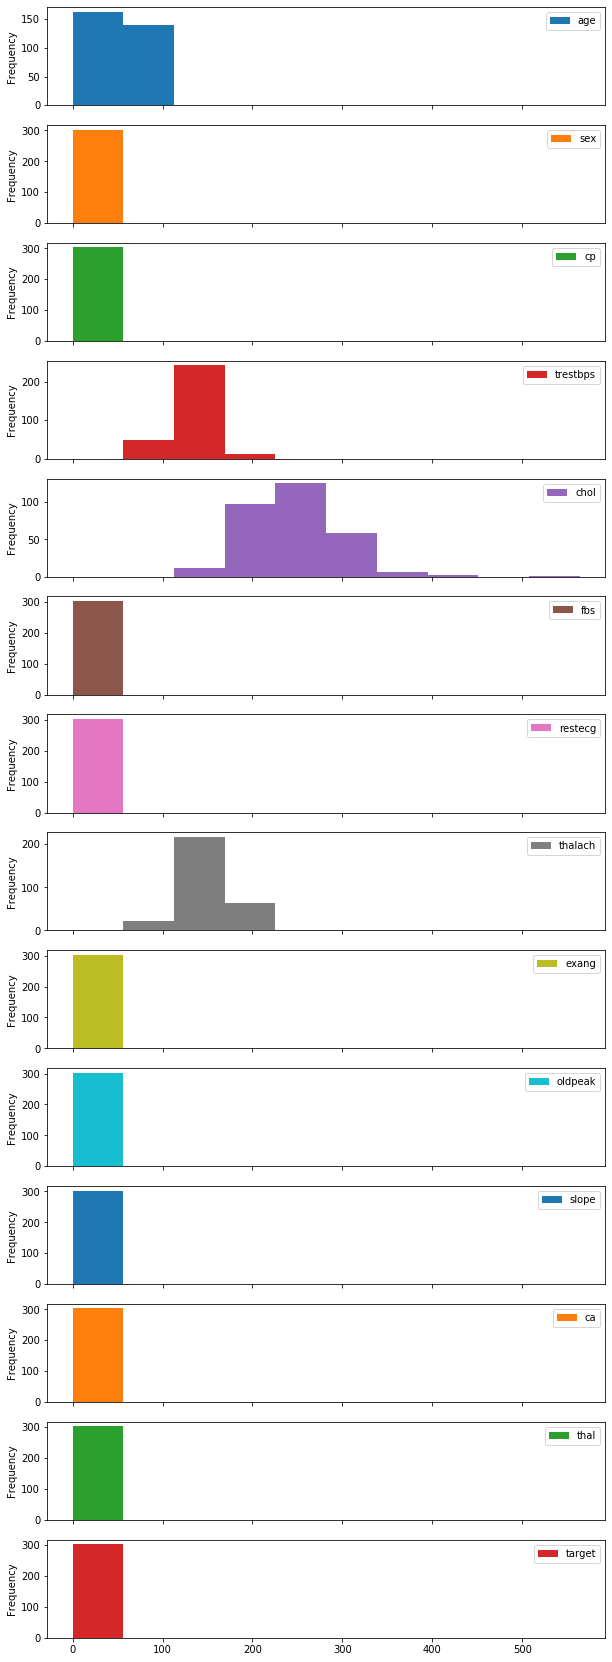

In [51]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [52]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


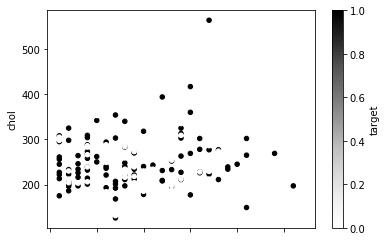

In [57]:
# Pyplot method
over_50.plot(kind="scatter",
             x= "age",
             y= "chol",
             c= "target");

(45, 100)

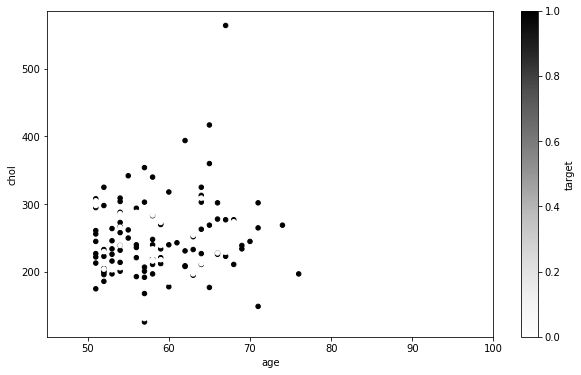

In [61]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind="scatter",
             x= "age",
             y= "chol",
             c= "target",
             ax= ax);

# ax.set_xlim([45, 100])

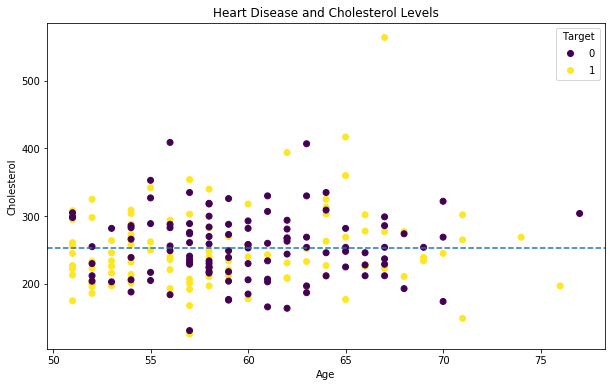

In [65]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

In [66]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


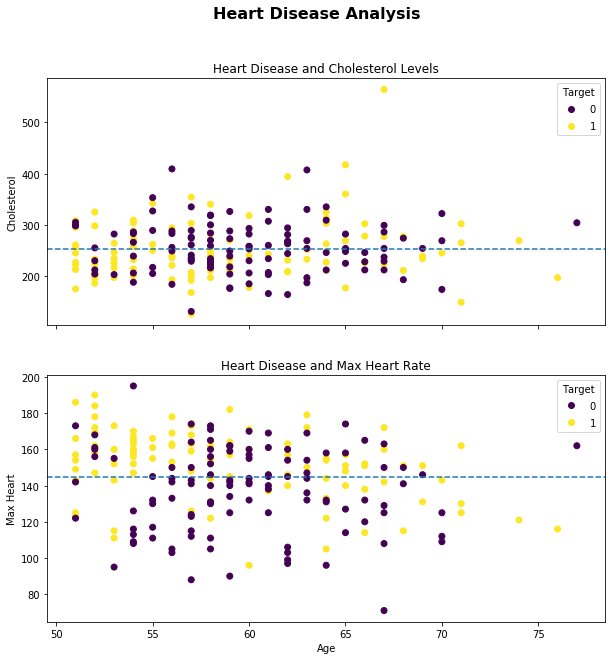

In [73]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

#Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--")

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart")
# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--")

#Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [74]:
# See the different styles available
plt.style.available


['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

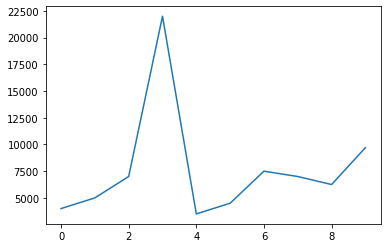

In [75]:
car_sales["Price"].plot();

In [76]:
plt.style.use('seaborn-whitegrid')

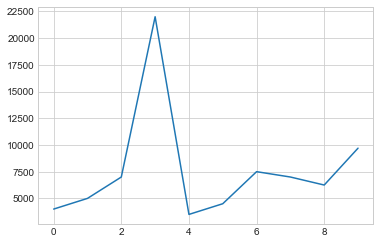

In [77]:
car_sales["Price"].plot();

In [78]:
plt.style.use('seaborn');

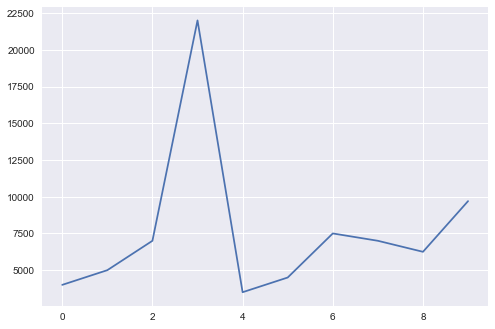

In [79]:
car_sales["Price"].plot();

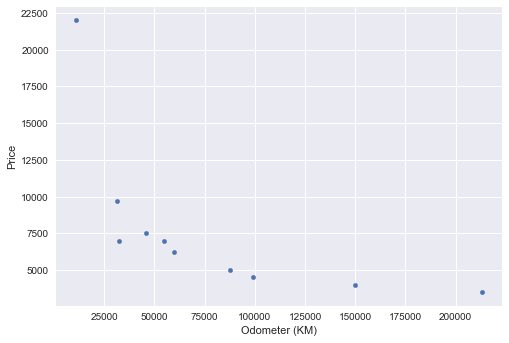

In [80]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

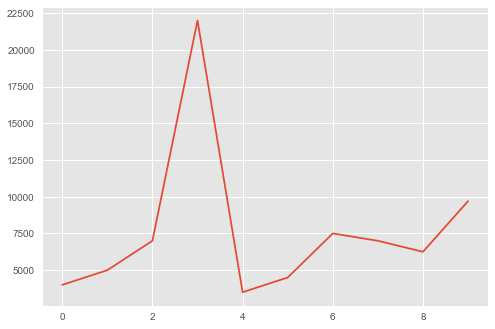

In [81]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [82]:
# Create some data
x = np.random.randn(10, 4)
x

array([[-0.44767313,  1.82414759, -0.69071215,  0.93175457],
       [ 0.44810792, -0.26063468,  0.50339788, -0.29707059],
       [ 0.06640918, -1.47975043, -0.46759711,  1.98743364],
       [ 0.79203583, -0.87025454,  0.1067862 , -0.44137281],
       [-1.23668039,  1.45797004, -1.37607498,  0.377594  ],
       [ 0.75262259, -0.47245796, -0.78358006, -1.32413861],
       [ 1.19051809,  0.41301226, -0.39944941,  0.13783947],
       [ 0.02074731, -0.57160356, -2.26602526, -0.59192733],
       [-1.16667711,  0.79617494,  0.67379294, -0.47615457],
       [ 0.25266612,  0.4722158 ,  0.11865702,  0.71818291]])

In [83]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

In [84]:
df

,a,b,c,d
0,-0.447673,1.824148,-0.690712,0.931755
1,0.448108,-0.260635,0.503398,-0.297071
2,0.066409,-1.479750,-0.467597,1.987434
3,0.792036,-0.870255,0.106786,-0.441373
4,-1.236680,1.457970,-1.376075,0.377594
5,0.752623,-0.472458,-0.783580,-1.324139
6,1.190518,0.413012,-0.399449,0.137839
7,0.020747,-0.571604,-2.266025,-0.591927
8,-1.166677,0.796175,0.673793,-0.476155
9,0.252666,0.472216,0.118657,0.718183


matplotlib.axes._subplots.AxesSubplot

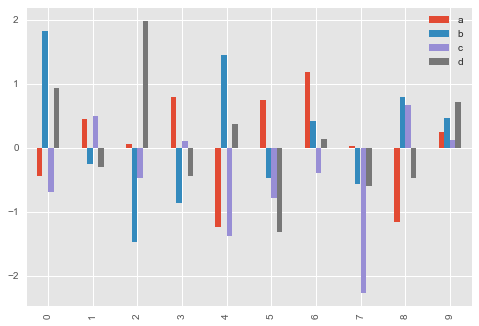

In [85]:
ax = df.plot(kind='bar')
type(ax)

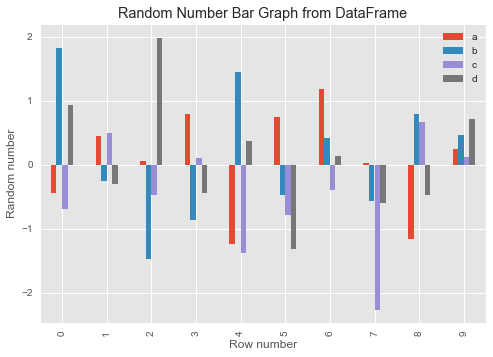

In [86]:
# Customize our plot with the set() method
ax = df.plot(kind='bar')
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
       xlabel="Row number",
       ylabel="Random number")
#Make the legend visible
ax.legend().set_visible(True);

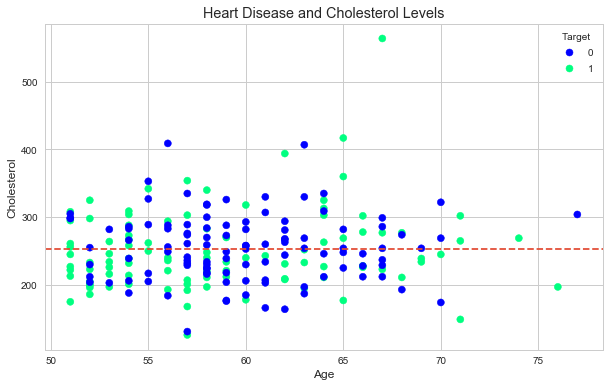

In [91]:
# Set the style
plt.style.use('seaborn-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter") # this changes the color scheme

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

This plot shows the information about the heard disease dataset...

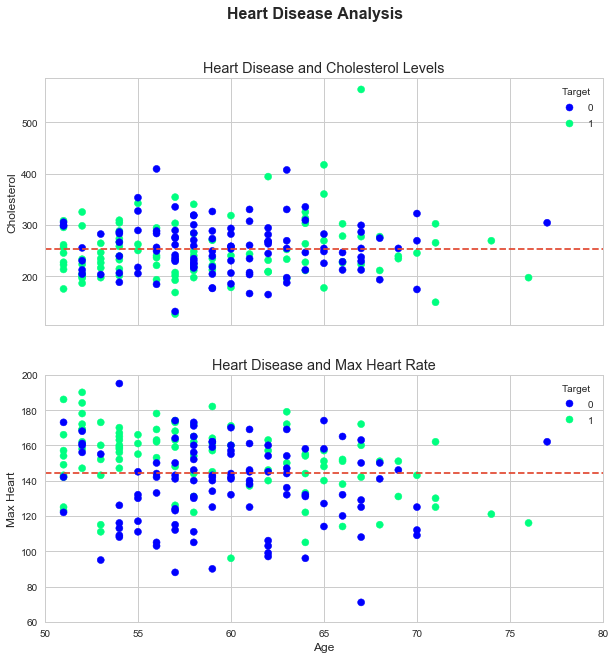

In [96]:
# Customizing the y and x axis limitations

# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 10),
                               sharex=True)

#Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
# Change the x axis limits
ax0.set_xlim([50, 80])
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--")

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="winter")

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart")
# Change ax1 x axis limits
ax1.set_xlim([50, 80])
# Change ax1 y axis limits
ax1.set_ylim([60, 200])
# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--")

#Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

In [97]:
fig.savefig("heart-disease-analysis-plot-saved-with-code.png")